### About this dataset

- Age : Age of the patient
- Sex : Sex of the patient
- exng: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg : resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- target : 0= less chance of heart attack 1= more chance of heart attack

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Explatory Data Analysis

- Barplots for Categorial Features

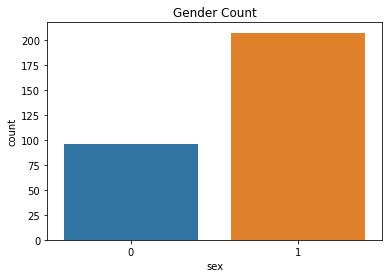

In [7]:
sns.countplot(x='sex', data = df).set_title('Gender Count');

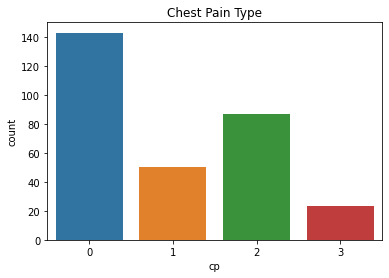

In [8]:
sns.countplot(x='cp', data=df).set_title('Chest Pain Type');

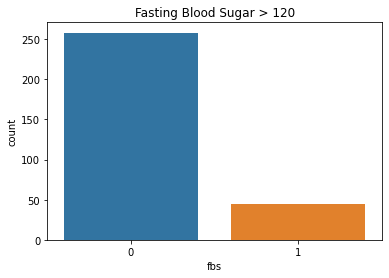

In [9]:
sns.countplot(x='fbs', data=df).set_title('Fasting Blood Sugar > 120');

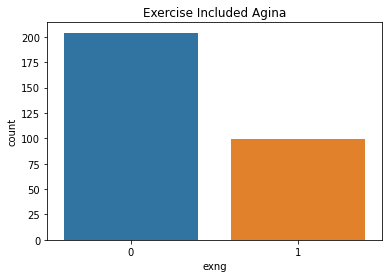

In [10]:
sns.countplot(x='exng', data=df).set_title('Exercise Included Agina');

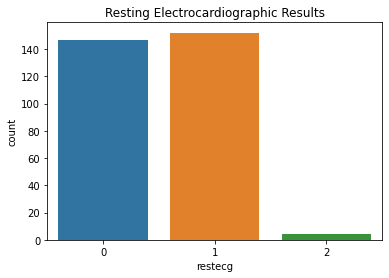

In [11]:
sns.countplot(x='restecg', data=df).set_title('Resting Electrocardiographic Results');

- Histograms for Numerical features

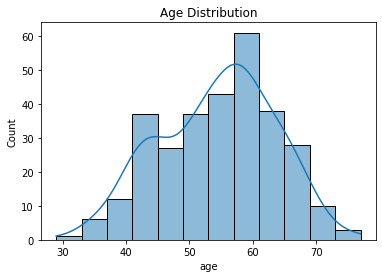

In [12]:
sns.histplot(x='age', data=df, kde=True).set_title('Age Distribution');

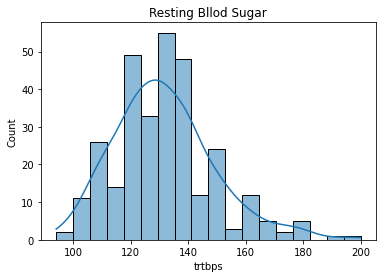

In [13]:
sns.histplot(x='trtbps', data=df, kde=True).set_title('Resting Bllod Sugar');

In [14]:
df['trtbps'].skew()

0.7137684379181465

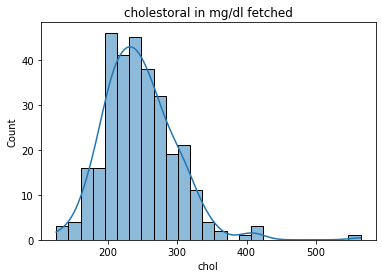

In [15]:
sns.histplot(x='chol', data=df, bins=25, kde=True).set_title('cholestoral in mg/dl fetched');

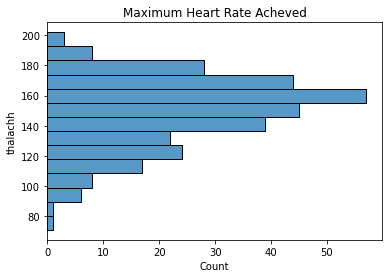

In [16]:
sns.histplot(y='thalachh', data=df).set_title('Maximum Heart Rate Acheved');

Text(0.5, 1.0, 'Does Men Have more chance ti Have a Heart Attack ?')

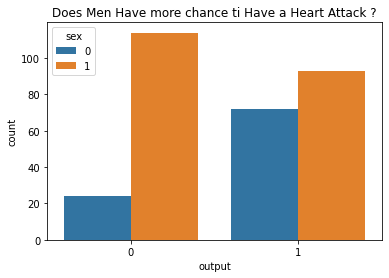

In [17]:
sns.countplot(x='output',hue='sex', data=df).set_title('Does Men Have more chance ti Have a Heart Attack ?')

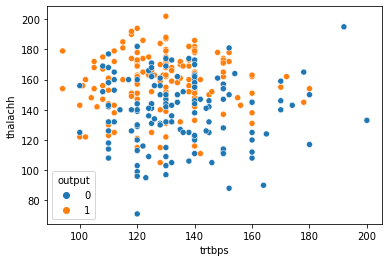

In [18]:
sns.scatterplot(x='trtbps' , y='thalachh',data=df, hue='output');

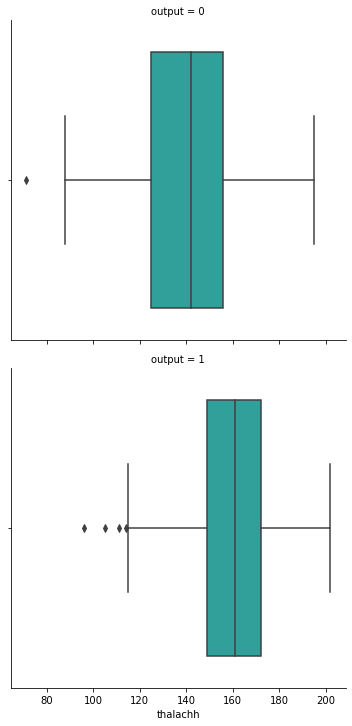

In [19]:
sns.catplot(x='thalachh',row='output',data=df,hue ='output', kind='box',  color="lightseagreen");

               age      chol  thalachh    trtbps
age       1.000000  0.213678 -0.398522  0.279351
chol      0.213678  1.000000 -0.009940  0.123174
thalachh -0.398522 -0.009940  1.000000 -0.046698
trtbps    0.279351  0.123174 -0.046698  1.000000


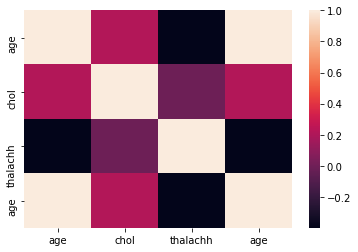

In [20]:
print(df[['age', 'chol', 'thalachh', 'trtbps']].corr())
sns.heatmap(df[['age', 'chol', 'thalachh', 'age']].corr());

# Machine Learning

In [21]:
df1 = df
X = df1.drop(['output'], axis=1)
y = df1[['output']]

- Logistic Regression

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=102)

print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape,'\n')

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

train_score = logistic_model.score(X_train, y_train)
test_score = logistic_model.score(X_test, y_test)

print("test score: {} train score: {}".format(test_score,train_score))

y_pred = logistic_model.predict(X_test)

The shape of X_train is       (227, 13)
The shape of X_test is        (76, 13)
The shape of y_train is       (227, 1)
The shape of y_test is        (76, 1) 

test score: 0.9210526315789473 train score: 0.8325991189427313


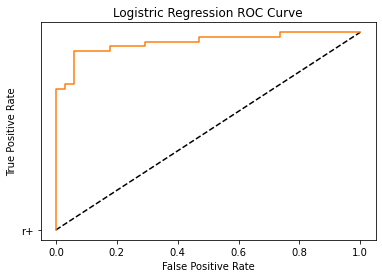

In [23]:
# calculating the probabilities
y_pred_prob = logistic_model.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

- K-Nearest Neighbor(KNN)

In [24]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=193) 

kmodel= KNeighborsClassifier()  
kmodel =  kmodel.fit(X_train, y_train) 

train_score =  kmodel.score(X_train,y_train)
test_score =  kmodel.score(X_test,y_test)  

print("test score: {} train score: {}".format(test_score,train_score))

y_pred =  kmodel.predict(X_test)

test score: 0.7368421052631579 train score: 0.73568281938326


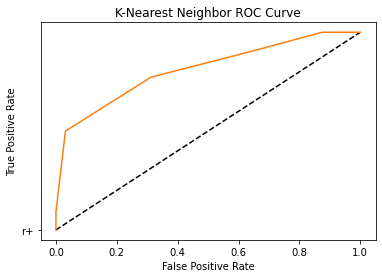

In [25]:
# calculating the probabilities
y_pred_prob = kmodel.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='K-Nearest Model')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("K-Nearest Neighbor ROC Curve")
plt.show()

- Naive Bayes

In [26]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=34) 

nmodel= GaussianNB()
nmodel =  nmodel.fit(X_train, y_train) 

train_score =  nmodel.score(X_train,y_train)
test_score =  nmodel.score(X_test,y_test)  

print("test score: {} train score: {}".format(test_score,train_score))

y_pred =  nmodel.predict(X_test)

test score: 0.8947368421052632 train score: 0.8414096916299559


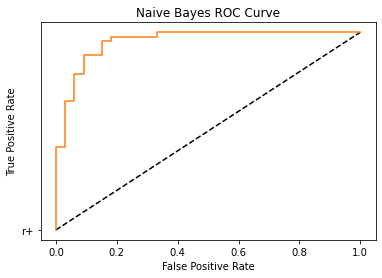

In [27]:
# calculating the probabilities
y_pred_prob = nmodel.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Naive Bayes')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes ROC Curve")
plt.show()

- Support Vector Machine (SVM)

In [28]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=8) 

smodel= SVC(probability = True)
smodel = smodel.fit(X_train, y_train) 

train_score =  smodel.score(X_train,y_train)
test_score =  smodel.score(X_test,y_test)  

print("test score: {} train score: {}".format(test_score,train_score))

y_pred =  smodel.predict(X_test)

test score: 0.7631578947368421 train score: 0.6828193832599119


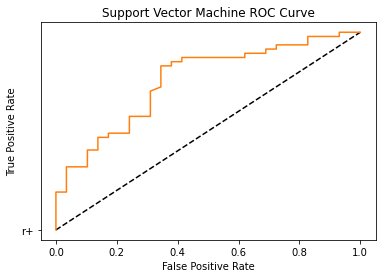

In [29]:
# calculating the probabilities
y_pred_prob = smodel.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Naive Bayes')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Support Vector Machine ROC Curve")
plt.show()

- As shown up Logsitc Regression has scored the best fit